In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import CSV
df = pd.read_csv(r'C:\sridevi\tmdb_5000_movies.csv')
/Users/katiehuang/Documents/Data Analytics/Udacity Data Analyst Nanodegree/Project 2 - TMDB Movie/tmdb-movies.csv')



In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

     -------------------------------------- 294.8/294.8 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [11]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()/len(df)*100

budget                   0.000000
genres                   0.000000
homepage                64.355611
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.572351
title                    0.000000
vote_average             0.000000
vote_count               0.000000
dtype: float64

In [15]:
df.drop(['homepage','tagline','keywords','overview','production_companies','release_date',
         'vote_count'], axis=1, inplace=True)

In [16]:
# Confirm that colummns are dropped
df.head()

,budget,genres,id,original_language,original_title,popularity,production_countries,revenue,runtime,spoken_languages,status,title,vote_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1


In [17]:
# Create a column for profit and profit margin
df['profit'] = df['revenue'] - df['budget']
df['profit_margin'] = df['profit']/df['revenue']*100

In [18]:
df.describe()

C:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,budget,id,popularity,revenue,runtime,vote_average,profit,profit_margin
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4.803000e+03,3913.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,5.321560e+07,-inf
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1.359677e+08,NaN
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,-1.657101e+08,-inf
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,-7.995375e+05,-83.333333
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,2.511317e+06,49.975327
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,5.531286e+07,76.887764
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,2.550965e+09,100.000000


In [19]:
budget = df.query('budget > 0')
budget.describe()

C:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,budget,id,popularity,revenue,runtime,vote_average,profit,profit_margin
count,3.766000e+03,3766.000000,3766.000000,3.766000e+03,3764.000000,3766.000000,3.766000e+03,3766.000000
mean,3.704284e+07,50257.822623,25.984641,1.039547e+08,109.324389,6.226474,6.691189e+07,-inf
std,4.264651e+07,82138.278362,34.438253,1.776399e+08,20.753408,0.966228,1.503957e+08,NaN
min,1.000000e+00,5.000000,0.001586,0.000000e+00,0.000000,0.000000,-1.657101e+08,-inf
25%,8.000000e+06,7196.750000,7.974990,6.009736e+06,95.000000,5.700000,-4.000000e+06,-103.674947
50%,2.300000e+07,12097.000000,17.604955,3.883137e+07,105.500000,6.300000,1.431553e+07,46.453399
75%,5.000000e+07,49523.250000,33.925801,1.220873e+08,120.000000,6.900000,7.858474e+07,74.628456
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,2.550965e+09,99.999988


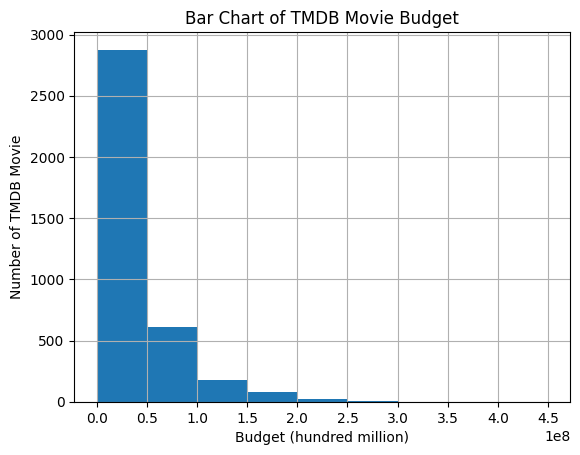

In [20]:
# Budget
x_ticks = np.arange(1.000000e+00,5.000000e+08,5.000000e+07)

budget['budget'].hist(bins=x_ticks)
plt.title("Bar Chart of TMDB Movie Budget")
plt.xlabel("Budget (hundred million)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie");

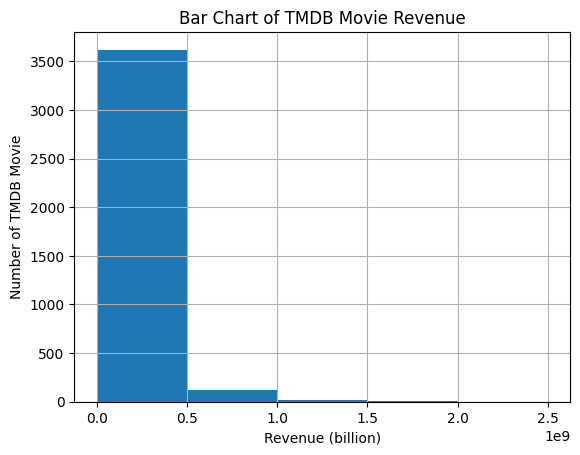

In [21]:
# Revenue
x_ticks = np.arange(0.000000e+00,3.000000e+09,5.000000e+08)

budget['revenue'].hist(bins=x_ticks)
plt.title("Bar Chart of TMDB Movie Revenue")
plt.xlabel("Revenue (billion)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie");

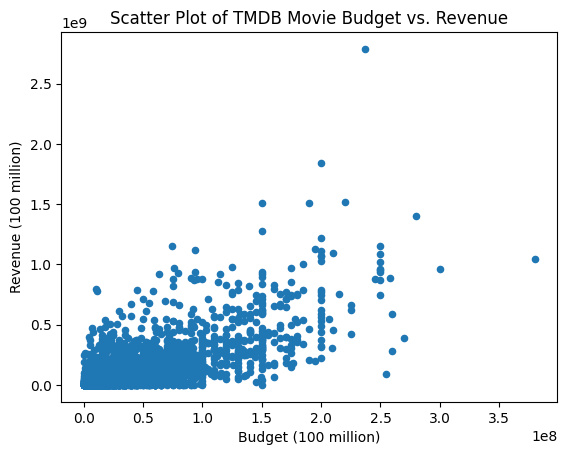

In [22]:
# Budget vs Revenue
budget.plot(y='revenue',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Revenue")
plt.xlabel("Budget (100 million)")
plt.ylabel("Revenue (100 million)");

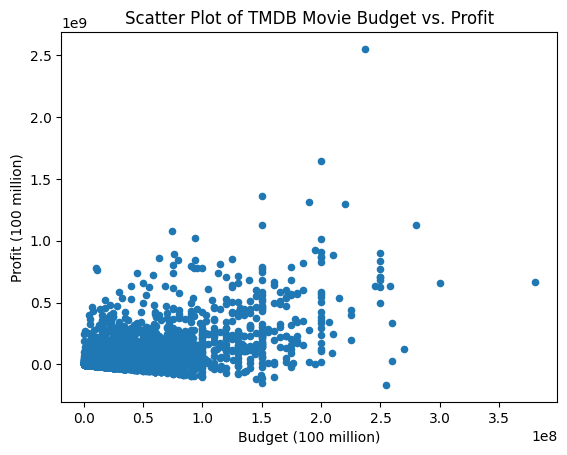

In [23]:
# Budget vs Profit
budget.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (100 million)")
plt.ylabel("Profit (100 million)");

In [24]:
blockbuster = budget.query('budget > 1.000000e+08')
blockbuster.describe()

C:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,budget,id,popularity,revenue,runtime,vote_average,profit,profit_margin
count,2.790000e+02,279.000000,279.000000,2.790000e+02,279.000000,279.000000,2.790000e+02,279.000000
mean,1.550914e+08,57207.240143,73.179527,4.843548e+08,121.688172,6.388172,3.292634e+08,-inf
std,4.147266e+07,78010.457364,68.963893,3.362338e+08,22.715306,0.752289,3.184821e+08,NaN
min,1.020000e+08,22.000000,2.871739,0.000000e+00,76.000000,4.100000,-1.657101e+08,-inf
25%,1.250000e+08,2071.000000,39.809016,2.630743e+08,103.000000,5.900000,1.199098e+08,46.140559
50%,1.500000e+08,20526.000000,58.485967,3.910812e+08,120.000000,6.400000,2.432589e+08,63.689722
75%,1.750000e+08,76703.000000,88.142983,6.507519e+08,137.500000,6.900000,4.995002e+08,75.962216
max,3.800000e+08,417859.000000,724.247784,2.787965e+09,194.000000,8.200000,2.550965e+09,91.499176


In [25]:
blockbuster.shape

(279, 15)

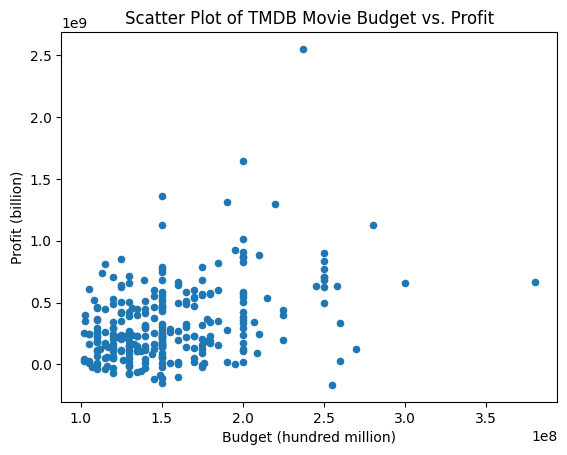

In [26]:
blockbuster.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (hundred million)")
plt.ylabel("Profit (billion)");

In [27]:
# Groupby Movie Title and Budget, Revenue and Profit for Top 10 Movies
blockbuster_grouped = blockbuster.groupby('original_title')[['budget','revenue','profit']].sum().sort_values('budget',ascending=False).iloc[:10,:]
blockbuster_grouped

,budget,revenue,profit
original_title,,,
Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,665713802
Pirates of the Caribbean: At World's End,300000000,961000000,661000000
Avengers: Age of Ultron,280000000,1405403694,1125403694
Superman Returns,270000000,391081192,121081192
John Carter,260000000,284139100,24139100
Tangled,260000000,591794936,331794936
Spider-Man 3,258000000,890871626,632871626
The Lone Ranger,255000000,89289910,-165710090
Harry Potter and the Half-Blood Prince,250000000,933959197,683959197


In [31]:
df['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [32]:
df['popularity'].mean()

21.492300588174057

In [33]:
df['genres'] = df['genres'].str.split("|") 
df.head(1)

,budget,genres,id,original_language,original_title,popularity,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,profit,profit_margin
0,237000000,"[[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""na...",19995,en,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,2550965087,91.499176


In [34]:
genre = df.explode('genres')
genre.head(3)

,budget,genres,id,original_language,original_title,popularity,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,profit,profit_margin
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,2550965087,91.499176
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,661000000,68.782518
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,635674609,72.180417


In [35]:
genre['genres'].value_counts()

genres
[{"id": 18, "name": "Drama"}]                                                                                                            370
[{"id": 35, "name": "Comedy"}]                                                                                                           282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                          164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                         144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                              142
                                                                                                                                        ... 
[{"id": 12, "name": "Adventure"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]            1
[{"id"

Text(0.5, 0, 'Count')

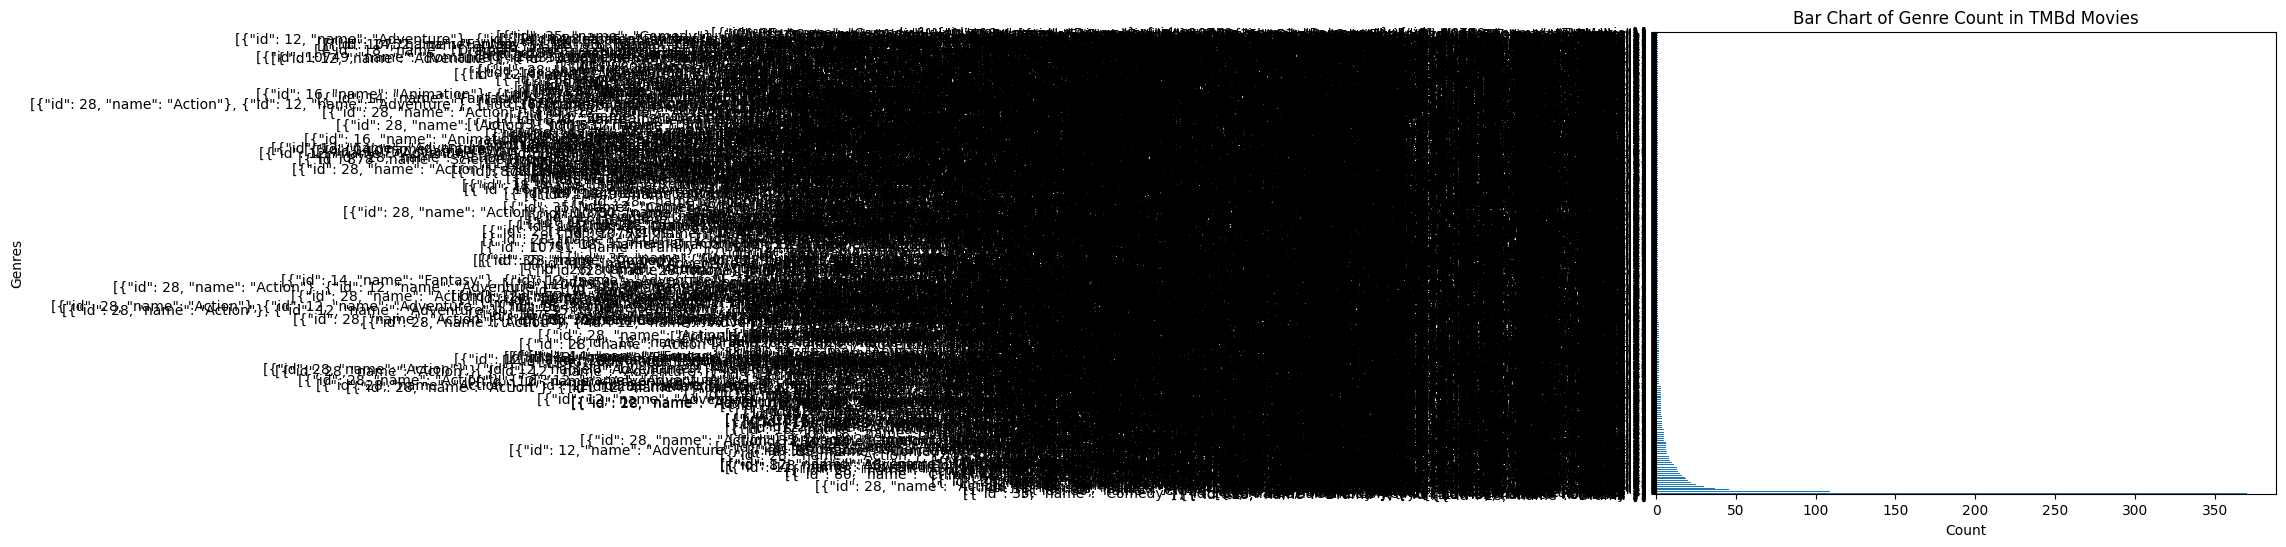

In [38]:
plt.figure(figsize=[8,6])
genre['genres'].value_counts().plot.barh()
plt.title("Bar Chart of Genre Count in TMBd Movies")
plt.ylabel("Genres")
plt.xlabel("Count")

In [39]:
genre_mean = genre.groupby('genres')[['popularity','revenue','profit']].mean().sort_values('popularity', ascending=False)
genre_mean.iloc[:10,:].query("popularity > 0.6464455549010583")


,popularity,revenue,profit
genres,,,
"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""name"": ""Comedy""}]",257.205060,4.812543e+08,3.772543e+08
"[{""id"": 878, ""name"": ""Science Fiction""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 53, ""name"": ""Thriller""}]",206.227151,7.521002e+08,6.271002e+08
"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""name"": ""Animation""}, {""id"": 28, ""name"": ""Action""}, {""id"": 35, ""name"": ""Comedy""}]",203.734590,6.521054e+08,4.871054e+08
"[{""id"": 878, ""name"": ""Science Fiction""}, {""id"": 28, ""name"": ""Action""}, {""id"": 53, ""name"": ""Thriller""}, {""id"": 12, ""name"": ""Adventure""}]",202.042635,4.406035e+08,2.856035e+08
"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""name"": ""Science Fiction""}]",194.354812,1.773831e+08,1.301331e+08
"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name"": ""Thriller""}]",187.322927,1.004558e+09,8.195584e+08
"[{""id"": 18, ""name"": ""Drama""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fiction""}]",167.932870,6.301619e+08,5.221619e+08
"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""name"": ""Science Fiction""}, {""id"": 9648, ""name"": ""Mystery""}, {""id"": 12, ""name"": ""Adventure""}]",167.583710,8.255328e+08,6.655328e+08
"[{""id"": 36, ""name"": ""History""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name"": ""Thriller""}, {""id"": 10752, ""name"": ""War""}]",145.364591,2.335557e+08,2.195557e+08
